In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
import time
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import chi2
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
ODI_data_2017_2021=pd.read_csv('/content/ODI-Data-2017-2021.csv')
ODI_data_1971_2017=pd.read_csv('/content/ODI-data-1971-2017-2.csv')


In [ ]:
ODI_data_1971_2017


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [ ]:
ODI_data_2017_2021

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"
...,...,...,...,...,...,...,...,...
490,490,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
491,491,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
492,492,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
493,493,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [ ]:
ODI_data_2017_2021=ODI_data_2017_2021.drop(range(0,116))
ODI_data_2017_2021.reset_index(inplace=True)
ODI_data_2017_2021=ODI_data_2017_2021.drop(['index'],axis=1)





In [ ]:
ODI_data_1971_2021= pd.concat([ODI_data_1971_2017,ODI_data_2017_2021],ignore_index=True)


In [ ]:
ODI_data_1971_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Unnamed: 0
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",NaN
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",NaN
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",NaN
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",NaN
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",NaN
...,...,...,...,...,...,...,...,...
4306,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",490.0
4307,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",491.0
4308,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",492.0
4309,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",493.0


In [ ]:
ODI_data_1971_2021=ODI_data_1971_2021.drop(['Unnamed: 0'],axis=1)


In [ ]:
ODI_data_2010_2021=ODI_data_1971_2021.drop(range(0,2936),axis=0)


In [ ]:
ODI_data_2010_2021.reset_index(inplace=True)


In [ ]:
ODI_data_2010_2021=ODI_data_2010_2021.drop(['index'],axis=1) 


In [ ]:
ODI_data_2010_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1370,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1371,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1372,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1373,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


# Basic EDA

## Know all the names of the columns¶

In [ ]:
ODI_data_2010_2021.columns


Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'Won_By_Runs', 'Won_By_Wickets', 'Team_1_First_Batting',
       'Team_2_First_Batting', 'Winning_team'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
ODI_data_2010_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scorecard             1312 non-null   object 
 1   Team 1                1312 non-null   object 
 2   Team 2                1312 non-null   object 
 3   Winner                1312 non-null   object 
 4   Margin                1312 non-null   object 
 5   Ground                1312 non-null   object 
 6   Match Date            1312 non-null   object 
 7   Won_By_Runs           1312 non-null   float64
 8   Won_By_Wickets        1312 non-null   float64
 9   Team_1_First_Batting  1312 non-null   int64  
 10  Team_2_First_Batting  1312 non-null   int64  
 11  Winning_team          1312 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 123.1+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
ODI_data_2010_2021.describe()


,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.129315,0.288186,0.494665,0.505335,1.405488
std,0.195172,0.322375,0.500162,0.500162,0.491173
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.100000,0.000000,1.000000,1.000000
75%,0.221818,0.600000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


## Get the total number of samples in the dataset using the len() function

In [ ]:
print('ODI dataset length:',len(ODI_data_2010_2021)) 


ODI dataset length: 1312


## Get unique values

In [ ]:
for x in ODI_data_2010_2021.columns:
  print(x, ':',len(ODI_data_2010_2021[x].unique()))


Scorecard : 1312
Team 1 : 23
Team 2 : 23
Winner : 23
Margin : 201
Ground : 124
Match Date : 1100
Won_By_Runs : 192
Won_By_Wickets : 11
Team_1_First_Batting : 2
Team_2_First_Batting : 2
Winning_team : 2


## Counting the total number of missing values

In [ ]:
ODI_data_2010_2021.isnull().sum()


Scorecard               0
Team 1                  0
Team 2                  0
Winner                  0
Margin                  0
Ground                  0
Match Date              0
Won_By_Runs             0
Won_By_Wickets          0
Team_1_First_Batting    0
Team_2_First_Batting    0
Winning_team            0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def perform_chi_square_test(var_1,var_2):
    contingency_table=pd.crosstab(ODI_data_2010_2021[var_1],ODI_data_2010_2021[var_2])
    observed_values=contingency_table.values
    b=chi2_contingency(contingency_table)
    expected_values=b[3]
    no_of_rows=len(contingency_table.iloc[0:,0])
    no_of_columns= len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print('Degree of Freedom:',degree_f)
    alpha=0.05
    print('significance level:',alpha)
    chi_square= sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi2_statistic=chi_square[0]+chi_square[1]
    print('chi square statistic:',chi2_statistic)
    critical_value=chi2.ppf(q=0.95,df=degree_f)
    print('critical value:',critical_value)
    p_value=1-chi2.cdf(x=chi2_statistic,df=degree_f)
    print('p_value',p_value )
    if chi2_statistic>=critical_value:
        print("Reject H0, there is a relation between 2 categorical variables")
    else:
        print("Reject H0, there is no relation between 2 categorical variables")
    if p_value<=alpha:
        print("Reject H0, there is a relation between 2 categorical variables") 
    else:
        print("Reject H0, there is no relation between 2 categorical variables")   

      

In [ ]:
for x in ODI_data_2010_2021.columns:
  for i in ODI_data_2010_2021.columns:
    if i !=x:
      print('chi_square test on:',x,'',i,'\n')
      perform_chi_square_test(x,i)
      print('--------------------------\n')
            

chi_square test on: Scorecard  Team 1 

Degree of Freedom: 30228
significance level: 0.05
chi square statistic: 2549.9999999999623
critical value: 30633.567183419527
p_value 1.0
Reject H0, there is no relation between 2 categorical variables
Reject H0, there is no relation between 2 categorical variables
--------------------------

chi_square test on: Scorecard  Team 2 

Degree of Freedom: 30228
significance level: 0.05
chi square statistic: 2592.0000000000355
critical value: 30633.567183419527
p_value 1.0
Reject H0, there is no relation between 2 categorical variables
Reject H0, there is no relation between 2 categorical variables
--------------------------

chi_square test on: Scorecard  Winner 

Degree of Freedom: 32976
significance level: 0.05
chi square statistic: 2557.000000000013
critical value: 33399.55082702824
p_value 1.0
Reject H0, there is no relation between 2 categorical variables
Reject H0, there is no relation between 2 categorical variables
--------------------------



From above chi-square test:

There is correlation between Team 1 and Winner data.

## groupby

You can use groupby to chunk up your data into subsets for further analysis.

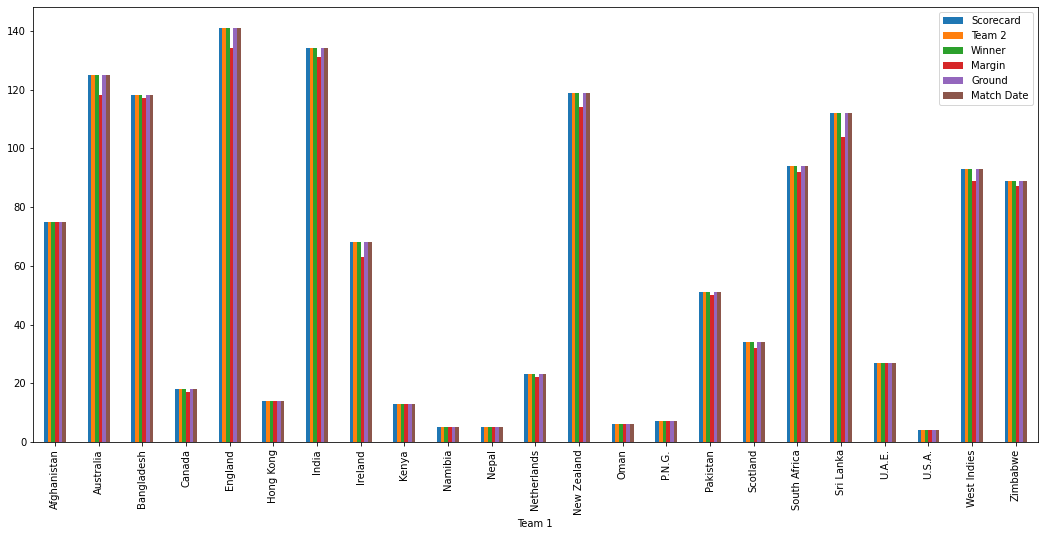

In [ ]:
ODI_data_2010_2021.groupby('Team 1').count().plot(kind='bar',figsize=(18,8))
plt.show()


from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

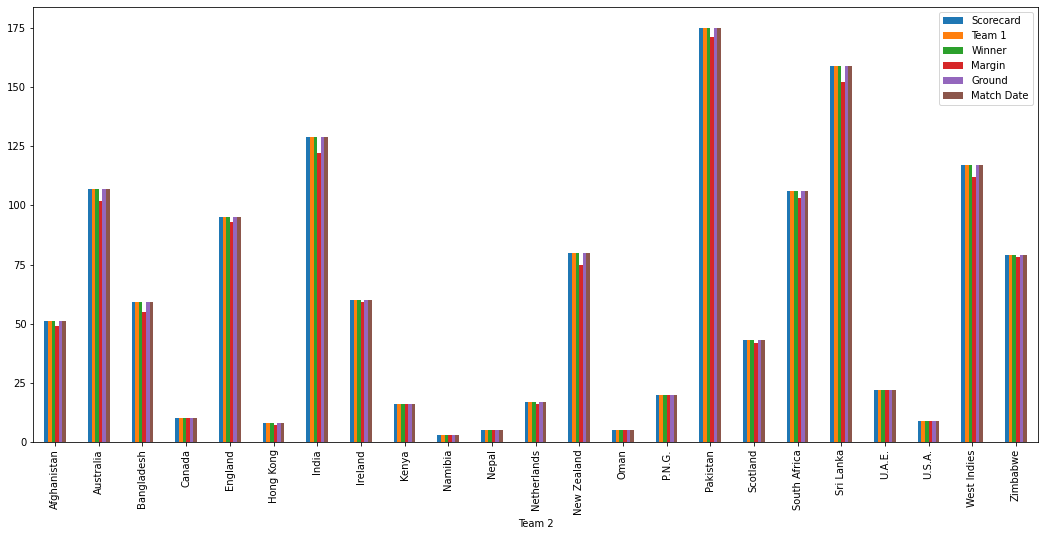

In [ ]:
ODI_data_2010_2021.groupby('Team 2').count().plot(kind='bar',figsize=(18,8))
plt.show()


from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

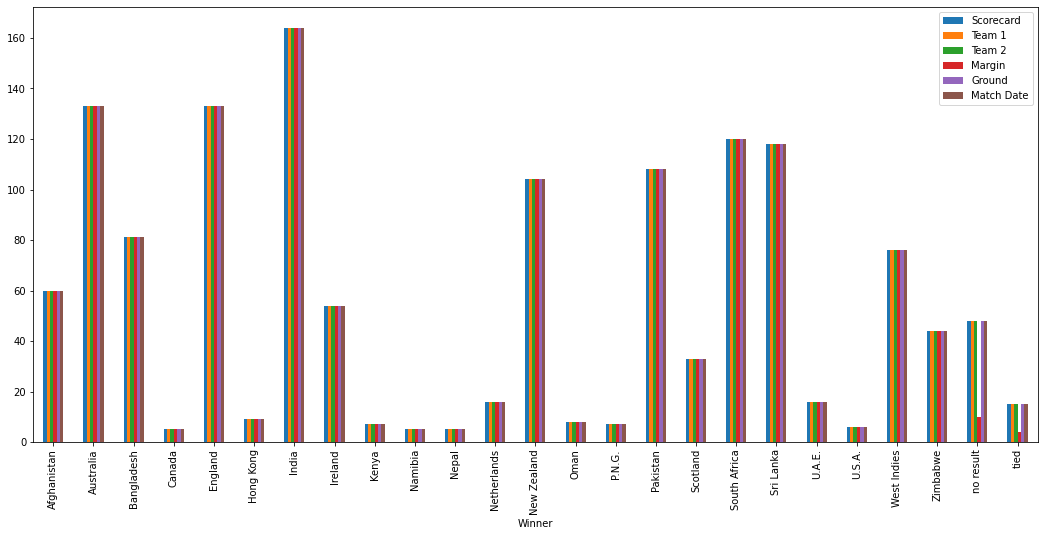

In [ ]:
ODI_data_2010_2021.groupby('Winner').count().plot(kind='bar',figsize=(18,8))
plt.show()


from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

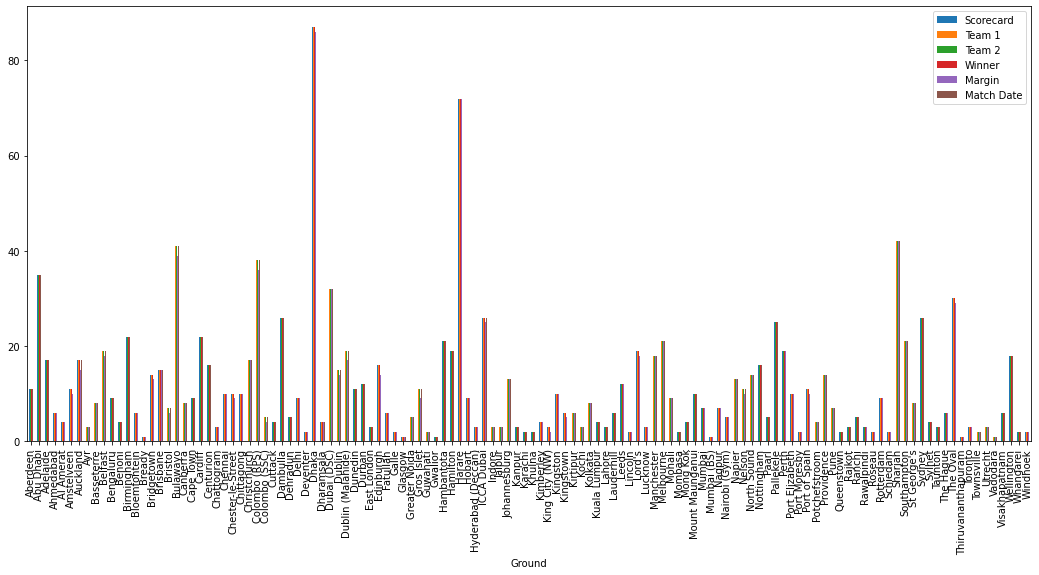

In [ ]:
ODI_data_2010_2021.groupby('Ground').count().plot(kind='bar',figsize=(18,8))
plt.show()


from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

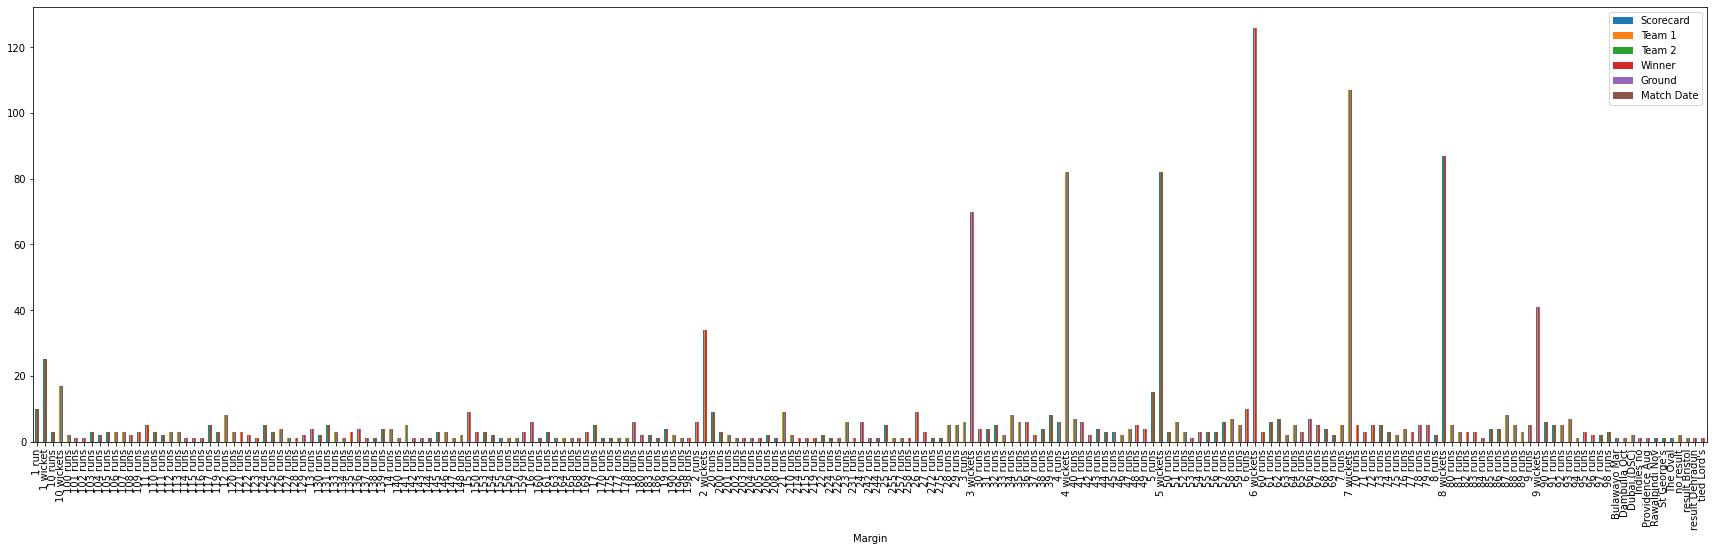

In [ ]:
ODI_data_2010_2021.groupby('Margin').count().plot(kind='bar',figsize=(30,8))
plt.show()


from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Catplot

Catplot shows frequencies of the of more than one categorical values at a time.

We will be doing categorical scatterplot using "swarm" kind 

<Figure size 1872x576 with 0 Axes>

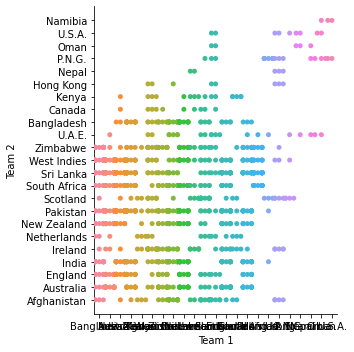

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Team 1',y='Team 2',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

<Figure size 1872x576 with 0 Axes>

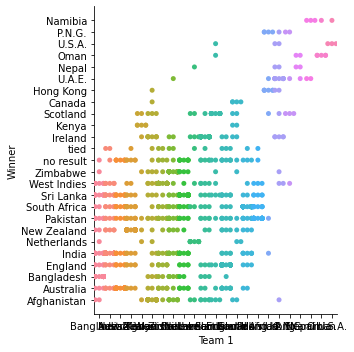

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Team 1',y='Winner',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<Figure size 1872x576 with 0 Axes>

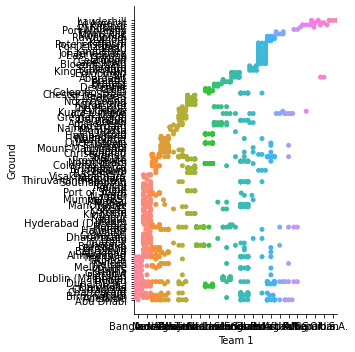

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Team 1',y='Ground',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

<Figure size 1872x576 with 0 Axes>

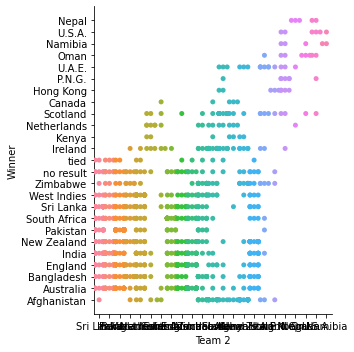

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Team 2',y='Winner',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<Figure size 1872x576 with 0 Axes>

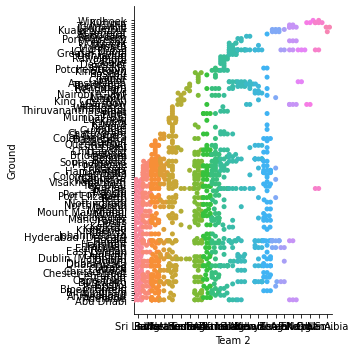

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Team 2',y='Ground',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

<Figure size 1872x576 with 0 Axes>

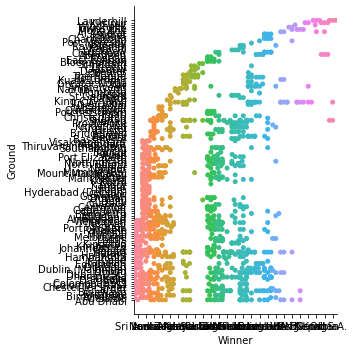

In [ ]:
plt.figure(figsize=(26,8))
sns.catplot(x='Winner',y='Ground',kind='swarm',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


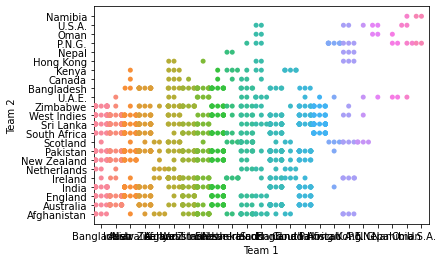

In [ ]:
sns.swarmplot(x='Team 1',y='Team 2',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

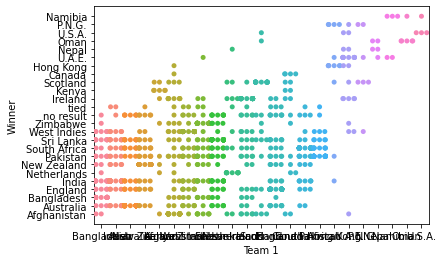

In [ ]:
sns.swarmplot(x='Team 1',y='Winner',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

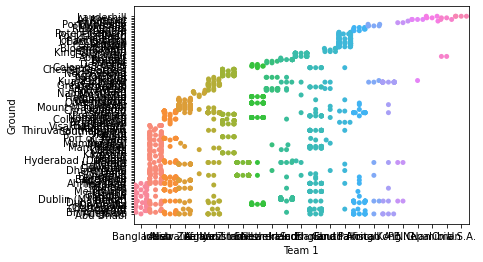

In [ ]:
sns.swarmplot(x='Team 1',y='Ground',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

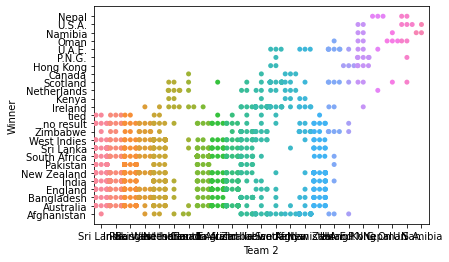

In [ ]:
sns.swarmplot(x='Team 2',y='Winner',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

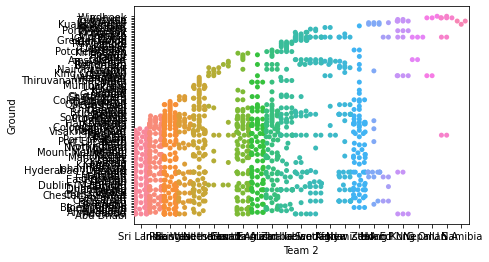

In [ ]:
sns.swarmplot(x='Team 2',y='Ground',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

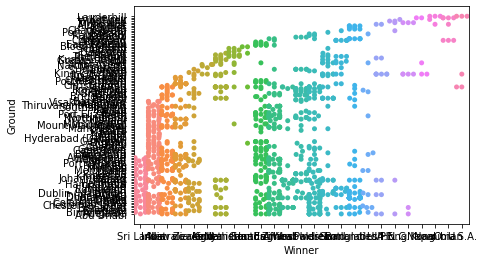

In [ ]:
sns.swarmplot(x='Winner',y='Ground',data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

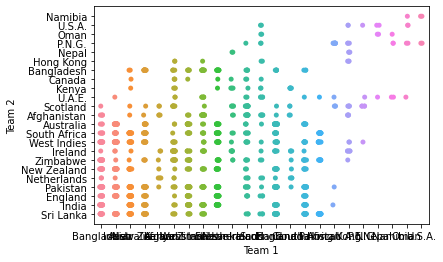

In [ ]:
sns.stripplot(x='Team 1',y='Team 2',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

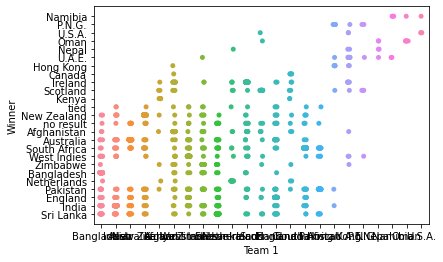

In [ ]:
sns.stripplot(x='Team 1',y='Winner',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

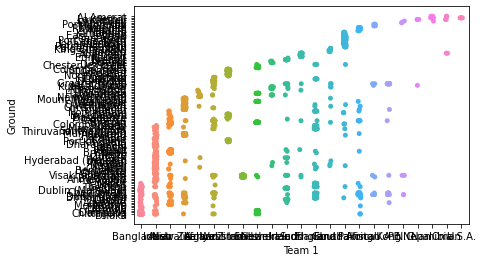

In [ ]:
sns.stripplot(x='Team 1',y='Ground',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

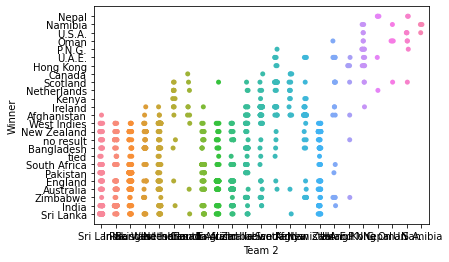

In [ ]:
sns.stripplot(x='Team 2',y='Winner',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

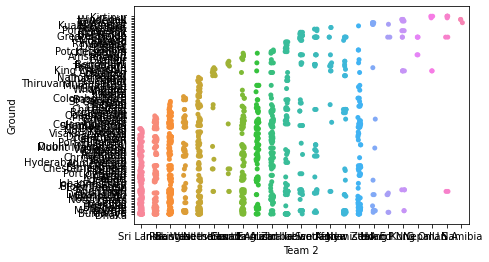

In [ ]:
sns.stripplot(x='Team 2',y='Ground',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

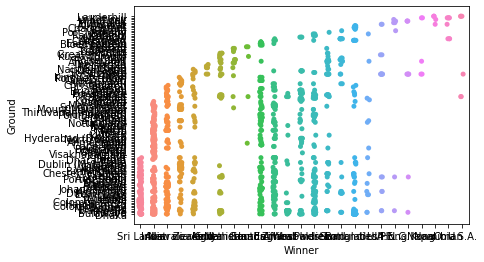

In [ ]:
sns.stripplot(x='Winner',y='Ground',data=ODI_data_2010_2021,jitter= True)
plt.show()


From the above graph:
1. Many Winner teams are having matches repeatedly at a particular range of ground.

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

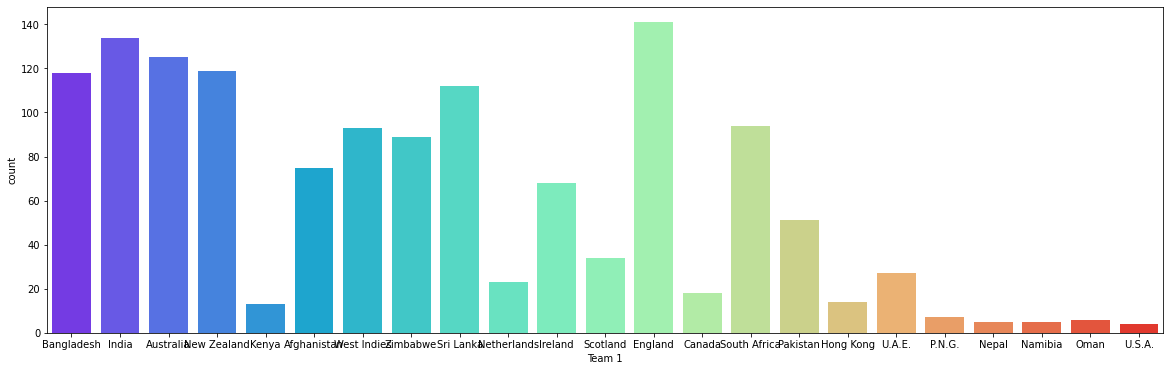

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Team 1',data=ODI_data_2010_2021,palette= 'rainbow')
plt.show()


From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

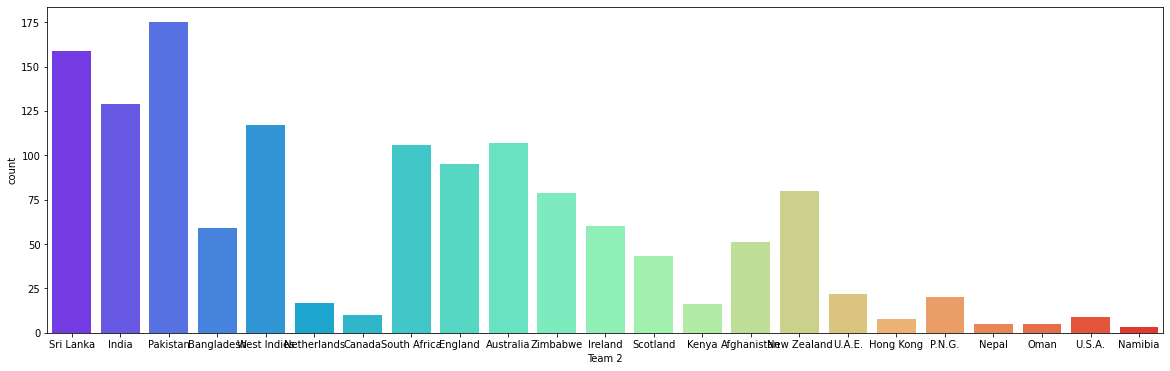

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Team 2',data=ODI_data_2010_2021,palette= 'rainbow')
plt.show()


From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

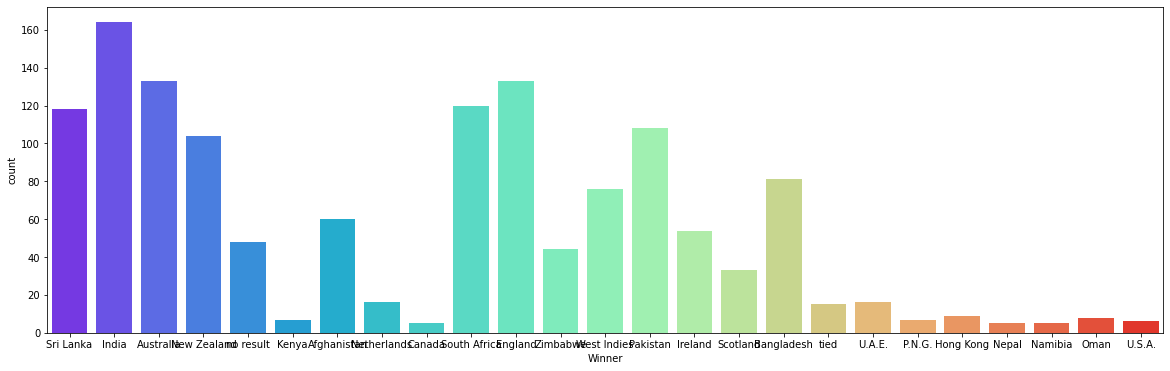

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Winner',data=ODI_data_2010_2021,palette= 'rainbow')
plt.show()


From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

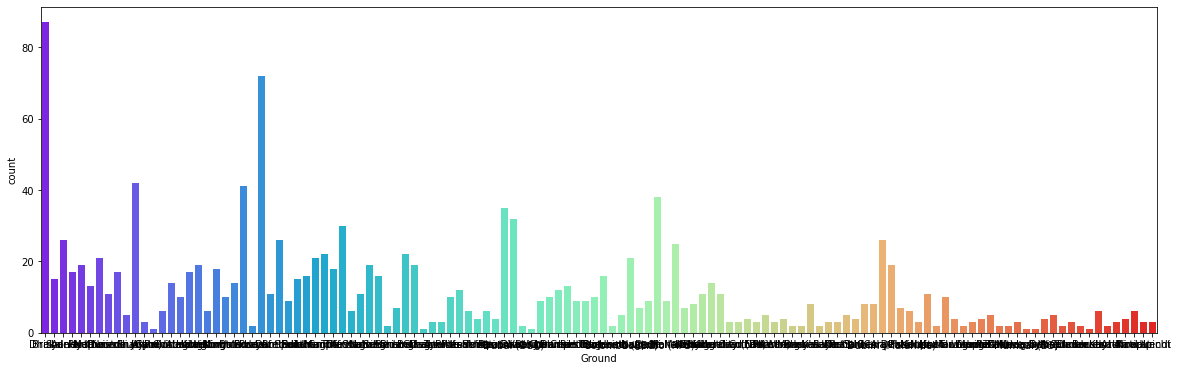

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Ground',data=ODI_data_2010_2021,palette= 'rainbow')
plt.show()


From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

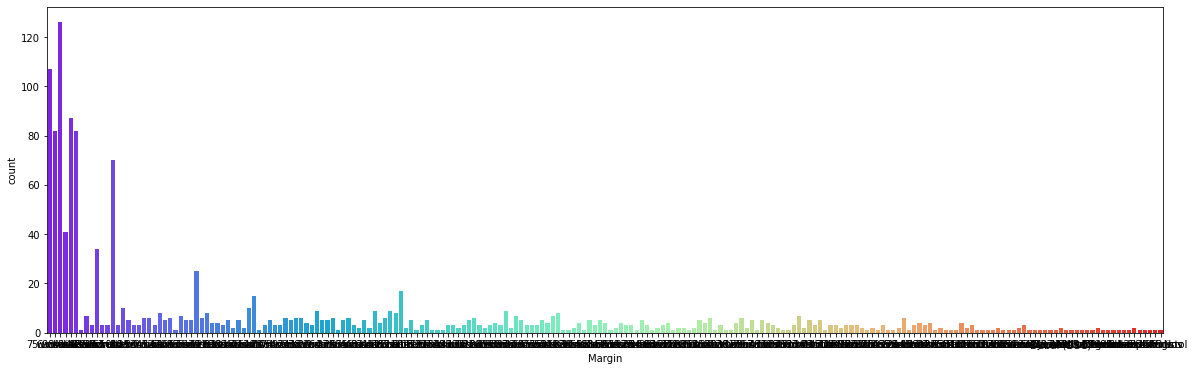

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Margin',data=ODI_data_2010_2021,palette= 'rainbow')
plt.show()


From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Dendrogram

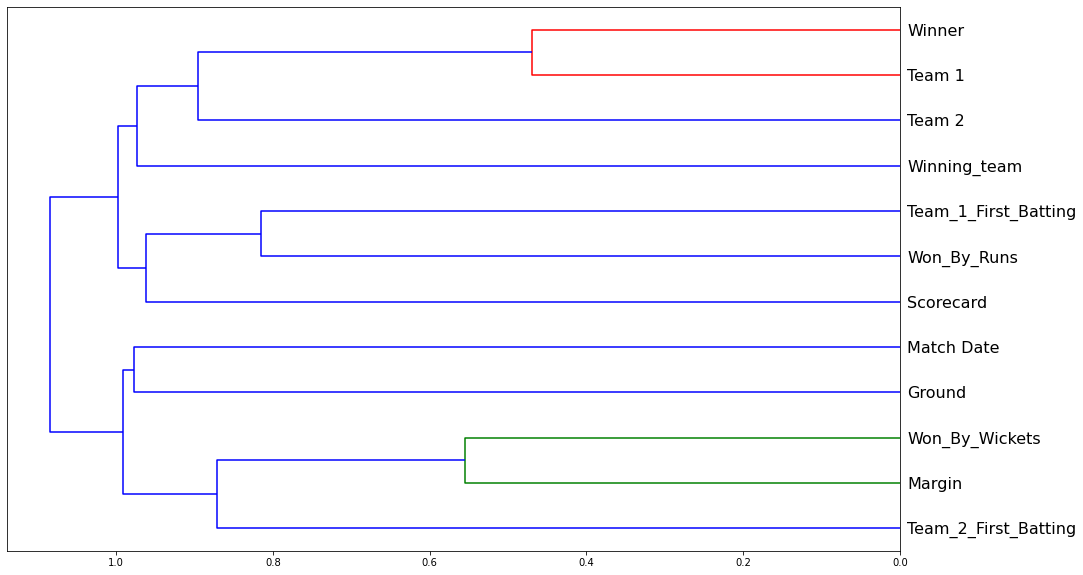

In [ ]:
X=ODI_data_2010_2021.dropna()
import scipy
from scipy.cluster import hierarchy as hc
cor=np.round(scipy.stats.spearmanr(X). correlation, 4)
corr_condensed=hc.distance.squareform(1-cor)
z=hc.linkage(corr_condensed,method='average')
fig=plt.figure(figsize=(16,10))
dendogram=hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()




observation from dendrogram

Strongly correlated variables:
    Team 1 and Winner

## Since, there are missing values in Margin column of dataset

We need to drop those empty columns. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [ ]:
ODI_data_2010_2021=ODI_data_2010_2021.dropna()
ODI_data_2010_2021.reset_index(inplace=True)
ODI_data_2010_2021=ODI_data_2010_2021.drop(['index'],axis=1)



In [ ]:
ODI_data_2010_2021=ODI_data_2010_2021[(ODI_data_2010_2021['Winner'] !='no result')&(ODI_data_2010_2021['Winner'] !='tied')]
ODI_data_2010_2021.reset_index(inplace=True)
ODI_data_2010_2021=ODI_data_2010_2021.drop(['index'],axis=1)

## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [ ]:
Won_by_runs=[]
Won_by_wickets=[]
for margin in ODI_data_2010_2021['Margin']:
  splitted_data=margin.split(' ')
  try:
    index=splitted_data.index('run')
    Won_by_runs.append(int(splitted_data[index-1]))
    Won_by_wickets.append(0)
  except:
    print('-')

  try:
    index=splitted_data.index('runs')
    Won_by_runs.append(int(splitted_data[index-1]))
    Won_by_wickets.append(0)
  except:
    print('-') 

  try:
    index=splitted_data.index('wicket')
    Won_by_wickets.append(int(splitted_data[index-1]))
    Won_by_runs.append(0)
  except:
    print('-') 

  try:
    index=splitted_data.index('wickets')
    Won_by_wickets.append(int(splitted_data[index-1]))
    Won_by_runs.append(0)
  except:
    print('-')  

ODI_data_2010_2021['Won_By_Runs'] = Won_by_runs  
ODI_data_2010_2021['Won_By_Wickets']=Won_by_wickets
    
ODI_data_2010_2021

 



-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [ ]:
team_1_first_batting=[]
team_2_first_batting=[]
for team1,team2,wickets,runs,winner in zip(ODI_data_2010_2021['Team 1'],ODI_data_2010_2021['Team 2'],ODI_data_2010_2021['Won_By_Wickets'],ODI_data_2010_2021['Won_By_Runs'],ODI_data_2010_2021['Winner']):
  if int(runs)>0 and winner == team1:
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)
  elif int(runs)>0 and winner == team2:
    team_1_first_batting.append(0)
    team_2_first_batting.append(1)
  elif int(wickets)>0 and winner == team1:
    team_1_first_batting.append(0)
    team_2_first_batting.append(1)
  elif int(wickets)>0 and winner == team2:
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)  

ODI_data_2010_2021['Team_1_First_Batting']=team_1_first_batting
ODI_data_2010_2021['Team_2_First_Batting']=team_2_first_batting


In [ ]:
ODI_data_2010_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [ ]:
winning_team=[]
for team1,team2,winner in zip(ODI_data_2010_2021['Team 1'],ODI_data_2010_2021['Team 2'],ODI_data_2010_2021['Winner']):
  if winner==team1:
    winning_team.append(1)
  elif winner==team2:
    winning_team.append(2)  

ODI_data_2010_2021['Winning_team']= winning_team


In [ ]:
ODI_data_2010_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


## Scaling

Scaling is very crucial part of teh workflow. 
As the data we have for example: 
Won_by_run has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [ ]:

def scale_data(df,col):
   from sklearn.preprocessing import MinMaxScaler
   scaler=MinMaxScaler()
   df[col]=scaler.fit_transform(df[col])
   return df
    
    
    

In [ ]:
col_train=['Won_By_Runs','Won_By_Wickets']
ODI_data_2010_2021=scale_data(ODI_data_2010_2021,col_train)


In [ ]:
dumified_data=pd.get_dummies(ODI_data_2010_2021,prefix=['Team 1','Team 2',],columns=['Team 1','Team 2',])


In [ ]:
dumified_data

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Canada,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,Team 1_Kenya,Team 1_Namibia,Team 1_Nepal,Team 1_Netherlands,Team 1_New Zealand,Team 1_Oman,Team 1_P.N.G.,Team 1_Pakistan,Team 1_Scotland,Team 1_South Africa,Team 1_Sri Lanka,Team 1_U.A.E.,Team 1_U.S.A.,Team 1_West Indies,Team 1_Zimbabwe,Team 2_Afghanistan,Team 2_Australia,Team 2_Bangladesh,Team 2_Canada,Team 2_England,Team 2_Hong Kong,Team 2_India,Team 2_Ireland,Team 2_Kenya,Team 2_Namibia,Team 2_Nepal,Team 2_Netherlands,Team 2_New Zealand,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.000000,0.7,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.000000,0.5,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.000000,0.6,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.000000,0.9,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.000000,0.8,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.000000,0.3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1308,ODI # 4310,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.483636,0.0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1309,ODI # 4311,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.000000,0.4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1310,ODI # 4312,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.000000,0.3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=dumified_data.drop(['Scorecard','Margin','Winner','Ground','Winning_team','Match Date'],axis=1)
y=ODI_data_2010_2021['Winning_team']


In [ ]:
test_data_X=X[1269:]
test_data_y=y[1269:]


In [ ]:
X=X.drop(range(1269,1312),axis=0)



In [ ]:
y=y.drop(range(1269,1312),axis=0)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123)


## Modeling

In [ ]:
import math 
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def print_score(m):
  res= classification_report(y_test,m.predict(X_test))
  print('Classification Report \n',res)

 

In [ ]:
def visualize_importance(feature_importances,feat_train_df):
  feature_importance_df=pd.DataFrame()
  _df=pd.DataFrame()
  _df['feature_importance']=feature_importances
  _df['column']=feat_train_df.columns
  feature_importance_df=pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
  order=feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]
  fig,ax=plt.subplots(figsize=(8,max(6,len(order)*.25)))
  sns.boxenplot(data=feature_importance_df,x='feature_importance',y='column',order=order,ax=ax,palette='viridis',orient='h')
  ax.tick_params(axis='x',rotation=0)
  ax.set_title('importance')
  ax.grid()
  fig.tight_layout()
  return fig,ax
    


### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Training st accuracy: 0.708
Test set accuracy: 0.677
Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.85      0.76       151
           2       0.66      0.43      0.52       103

    accuracy                           0.68       254
   macro avg       0.67      0.64      0.64       254
weighted avg       0.67      0.68      0.66       254



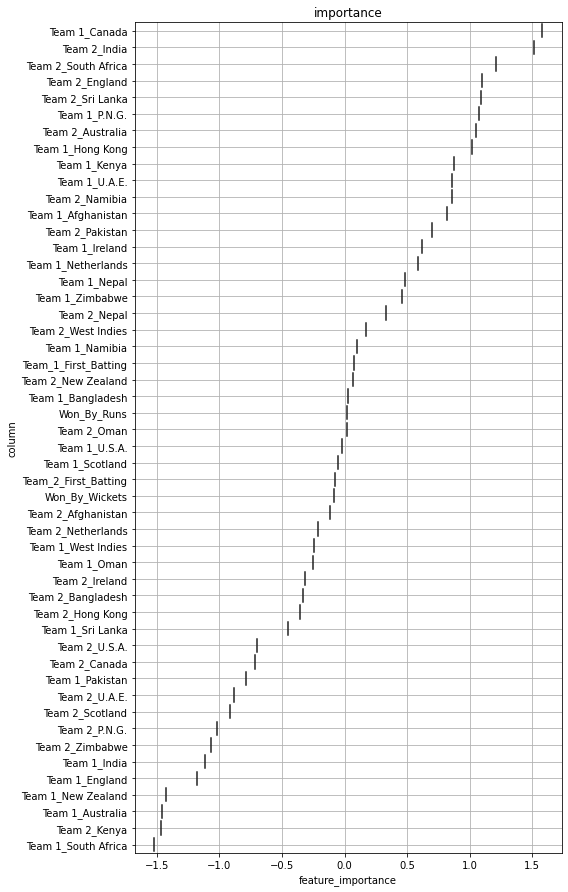

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression()
log_clf.fit(X_train,y_train)
score=log_clf.score(X_train,y_train)
score2=log_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(log_clf)
fig,ax=visualize_importance(log_clf.coef_[0],X)


### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Training st accuracy: 1.000
Test set accuracy: 0.996
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       151
           2       1.00      0.99      1.00       103

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254



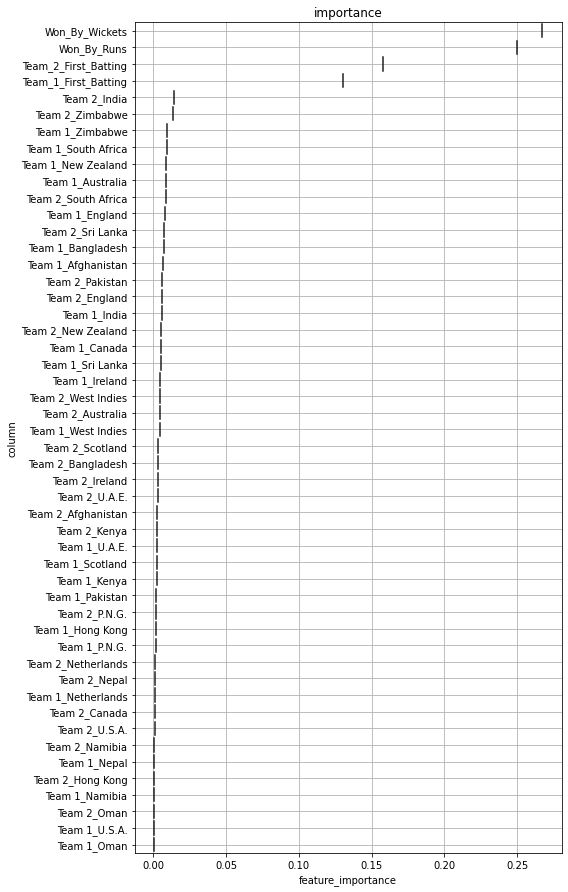

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
score=rf.score(X_train,y_train)
score2=rf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(rf)
fig,ax=visualize_importance(rf.feature_importances_,X)


### XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework.

Training st accuracy: 0.916
Test set accuracy: 0.839
Classification Report 
               precision    recall  f1-score   support

           1       0.80      0.97      0.88       151
           2       0.93      0.65      0.77       103

    accuracy                           0.84       254
   macro avg       0.87      0.81      0.82       254
weighted avg       0.85      0.84      0.83       254



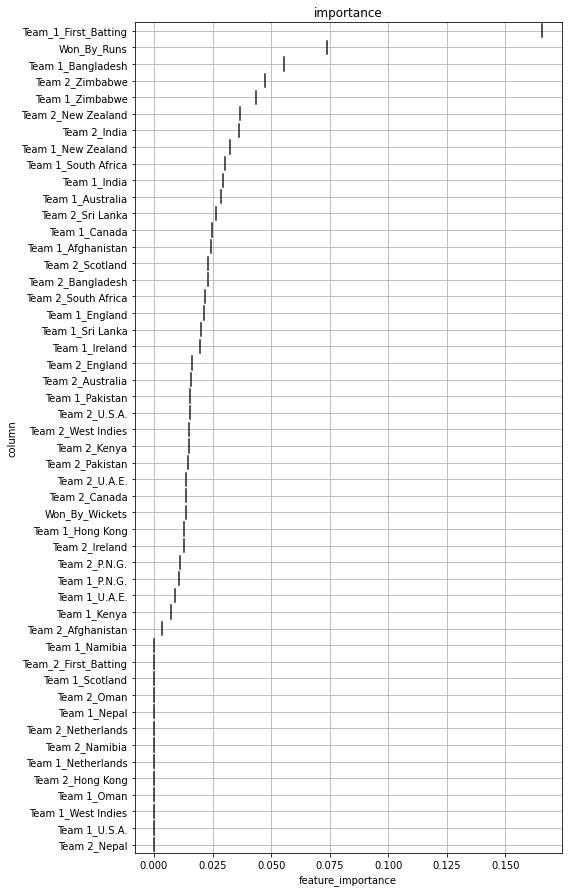

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)
score=xgb_clf.score(X_train,y_train)
score2=xgb_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(xgb_clf)
fig,ax=visualize_importance(xgb_clf.feature_importances_,X)


### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
score=svc.score(X_train,y_train)
score2=svc.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(svc)

Training st accuracy: 0.976
Test set accuracy: 0.945
Classification Report 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95       151
           2       0.97      0.89      0.93       103

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254



### GaussianNB

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. 
It's specifically used when the features have continuous values. 
It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [ ]:
from sklearn.naive_bayes import  GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
score=GNB.score(X_train,y_train)
score2=GNB.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(GNB)


Training st accuracy: 0.629
Test set accuracy: 0.638
Classification Report 
               precision    recall  f1-score   support

           1       0.63      0.93      0.75       151
           2       0.67      0.21      0.32       103

    accuracy                           0.64       254
   macro avg       0.65      0.57      0.54       254
weighted avg       0.65      0.64      0.58       254



### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(leaf_size=29,p=1,n_neighbors=24)
knn_clf.fit(X_train,y_train)
score=knn_clf.score(X_train,y_train)
score2=knn_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(knn_clf)


Training st accuracy: 0.967
Test set accuracy: 0.929
Classification Report 
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       151
           2       0.97      0.85      0.91       103

    accuracy                           0.93       254
   macro avg       0.94      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
score=dt_clf.score(X_train,y_train)
score2=dt_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(dt_clf)



Training st accuracy: 1.000
Test set accuracy: 0.969
Classification Report 
               precision    recall  f1-score   support

           1       0.96      0.99      0.97       151
           2       0.99      0.93      0.96       103

    accuracy                           0.97       254
   macro avg       0.97      0.96      0.97       254
weighted avg       0.97      0.97      0.97       254



### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBR_clf=GradientBoostingClassifier()
GBR_clf.fit(X_train,y_train)
score=GBR_clf.score(X_train,y_train)
score2=GBR_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(GBR_clf)


Training st accuracy: 0.872
Test set accuracy: 0.776
Classification Report 
               precision    recall  f1-score   support

           1       0.76      0.91      0.83       151
           2       0.82      0.57      0.67       103

    accuracy                           0.78       254
   macro avg       0.79      0.74      0.75       254
weighted avg       0.78      0.78      0.77       254



### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg_clf=BaggingClassifier()
bg_clf.fit(X_train,y_train)
score=bg_clf.score(X_train,y_train)
score2=bg_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(bg_clf)


Training st accuracy: 1.000
Test set accuracy: 0.980
Classification Report 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98       151
           2       1.00      0.95      0.98       103

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_clf=AdaBoostClassifier()
Ada_clf.fit(X_train,y_train)
score=Ada_clf.score(X_train,y_train)
score2=Ada_clf.score(X_test,y_test)
print('Training st accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))
print_score(Ada_clf)


Training st accuracy: 0.697
Test set accuracy: 0.673
Classification Report 
               precision    recall  f1-score   support

           1       0.69      0.83      0.75       151
           2       0.64      0.45      0.53       103

    accuracy                           0.67       254
   macro avg       0.66      0.64      0.64       254
weighted avg       0.67      0.67      0.66       254



### Now working with test dataset (year 2021 matches)

In [ ]:
test_y_df=pd.DataFrame(data=test_data_y)
test_y_df


,Winning_team
1269,2
1270,1
1271,1
1272,1
1273,1
1274,1
1275,1
1276,1
1277,1
1278,1


In [ ]:
match_result=pd.DataFrame()
match_result['Team 1']=ODI_data_2010_2021['Team 1'][1269:]
match_result['Team 2']=ODI_data_2010_2021['Team 2'][1269:]
match_result['Winner']=ODI_data_2010_2021['Winner'][1269:]
match_result

,Team 1,Team 2,Winner
1269,U.A.E.,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh
1271,Afghanistan,Ireland,Afghanistan
1272,Bangladesh,West Indies,Bangladesh
1273,Afghanistan,Ireland,Afghanistan
1274,Bangladesh,West Indies,Bangladesh
1275,Afghanistan,Ireland,Afghanistan
1276,West Indies,Sri Lanka,West Indies
1277,West Indies,Sri Lanka,West Indies
1278,West Indies,Sri Lanka,West Indies


In [ ]:
predicted_winner=knn_clf.predict(test_data_X)
res=pd.DataFrame()
res['Actual']=test_y_df['Winning_team']
res['predicted']=predicted_winner
pred_winner=[]
for pred,team1,team2 in zip(res['predicted'],match_result['Team 1'],match_result['Team 2']):
  if pred==1:
      pred_winner.append(team1)
  elif pred==2:
      pred_winner.append(team2)
match_result['pred_winner']=pred_winner          



In [ ]:
match_result

,Team 1,Team 2,Winner,pred_winner
1269,U.A.E.,Ireland,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh,Bangladesh
1271,Afghanistan,Ireland,Afghanistan,Afghanistan
1272,Bangladesh,West Indies,Bangladesh,Bangladesh
1273,Afghanistan,Ireland,Afghanistan,Afghanistan
1274,Bangladesh,West Indies,Bangladesh,Bangladesh
1275,Afghanistan,Ireland,Afghanistan,Afghanistan
1276,West Indies,Sri Lanka,West Indies,West Indies
1277,West Indies,Sri Lanka,West Indies,West Indies
1278,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner. we have seen that Random forest outperformed all other model. Accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95% that is really good.

Also other models such as SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90% and f1 score above 90%.

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.